In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Business Overview

- There are a lot of people try to bring new innovations to mobile phone in this of ever-transforming technology world, but there are a lot of a strong existed mobile phone company, along with their various-ranging prices. The author of this project aims to give a guidance or instruction for the upcoming innovators of mobile phone, of what they can offer in their products, especially letting them know what are the features that really take part in determining the price of the phone.
- The output of this project is the launching of the most important feature to the idea of grouping the mobile phone prices.
- Machine learning task that is going to be used for this project is supervised learning, with models such as: Decision Tree Classifier, K Nearest Neighbors, and Logistic Regression.
- Evaluation metrics for the models are R squared score.
- The risk that is going to be encountered after the release of this project is although the features that has been resulted have a strong role to determine mobile phone range price, there is still going to be an external factor that can clout the market's interest for buying mobile phones. Consider a trend of a colored phone in early 2000s can really attract mass buyers to buy the product, although the functionality of the product is not really the priority. Future mobile phone innovators discretion may be advised.

### Data Upload

In [2]:
df_mobile = pd.read_csv('phone_train.csv')
df_mobile_test = pd.read_csv('phone_test.csv')
df_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Exploratory Data Analysis

In [3]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

No null values in each columns

In [17]:
df_mobile['diagonal'] = np.sqrt(df_mobile['sc_h']**2 + df_mobile['sc_w']**2)

In [16]:
df_mobile['ratio_ram_memory'] = (df_mobile['ram']/1000)/df_mobile['int_memory']

In [18]:
from sklearn.model_selection import train_test_split
X = df_mobile.drop('price_range', axis=1)
y = df_mobile['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.3, stratify=y)
df_mobile_train = pd.concat([X_train, y_train], axis=1)
df_mobile_test = pd.concat([X_test, y_test], axis=1)

In [19]:
df_mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,ratio_ram_memory,diagonal,price_range
760,1432,1,1.7,1,6,1,39,0.3,164,4,...,504,14,4,10,1,1,0,0.012923,14.560220,0
1887,1719,1,2.1,1,0,0,52,0.1,187,3,...,2610,10,1,11,1,1,1,0.050192,10.049876,2
964,648,0,1.9,1,4,0,8,1.0,91,5,...,2991,8,7,4,0,0,1,0.373875,10.630146,2
1717,1337,1,2.7,1,0,0,5,0.7,200,4,...,3242,10,1,20,0,1,0,0.648400,10.049876,2
85,1412,1,2.4,0,5,0,25,0.8,96,8,...,837,15,9,4,0,0,1,0.033480,17.492856,1


array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>],

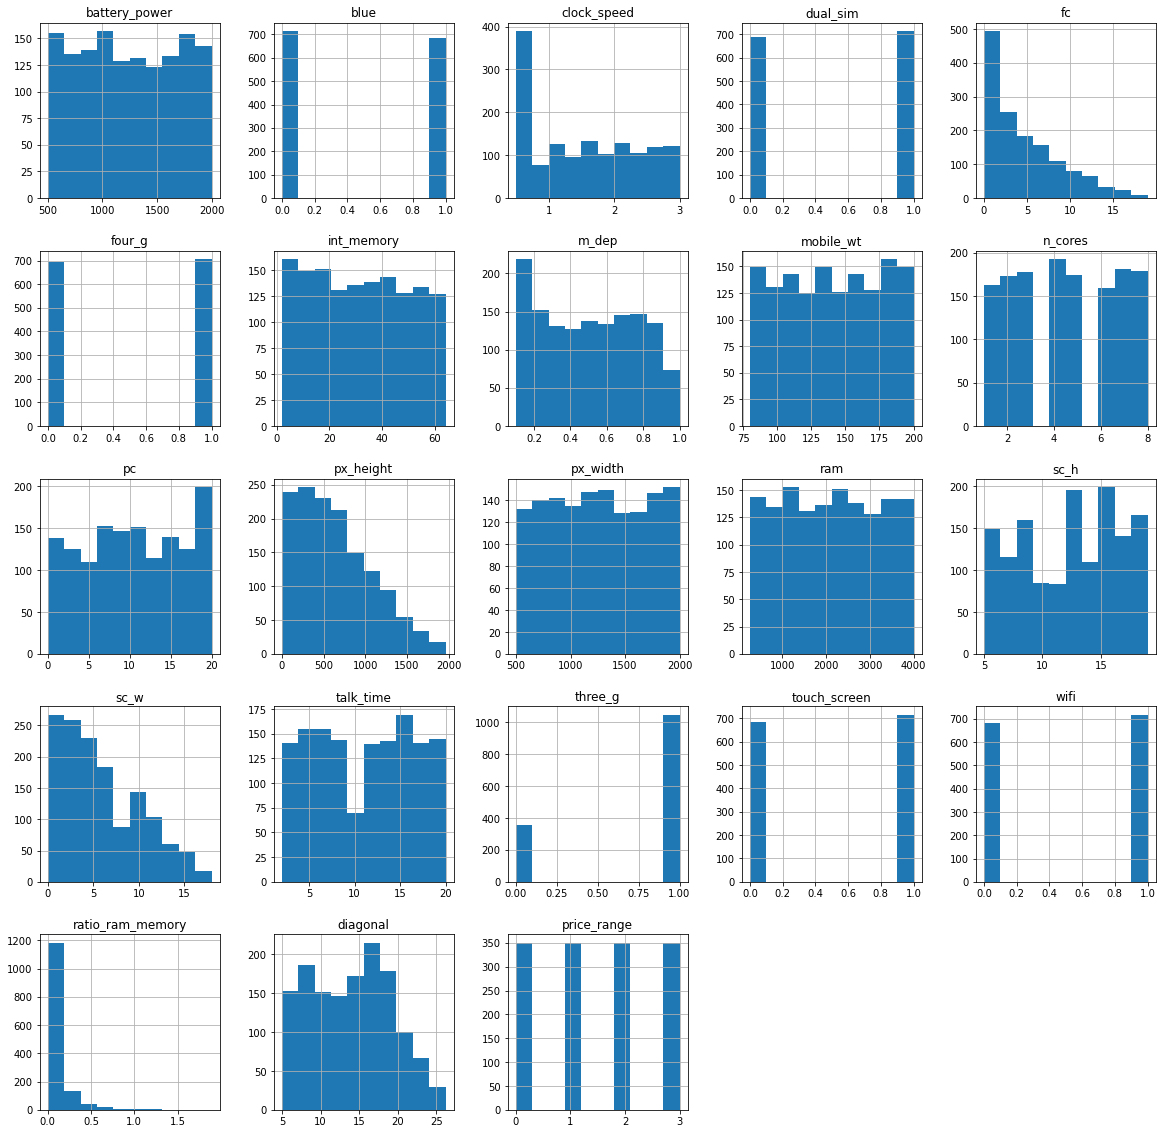

In [20]:
df_mobile_train.hist(figsize=(20,20))

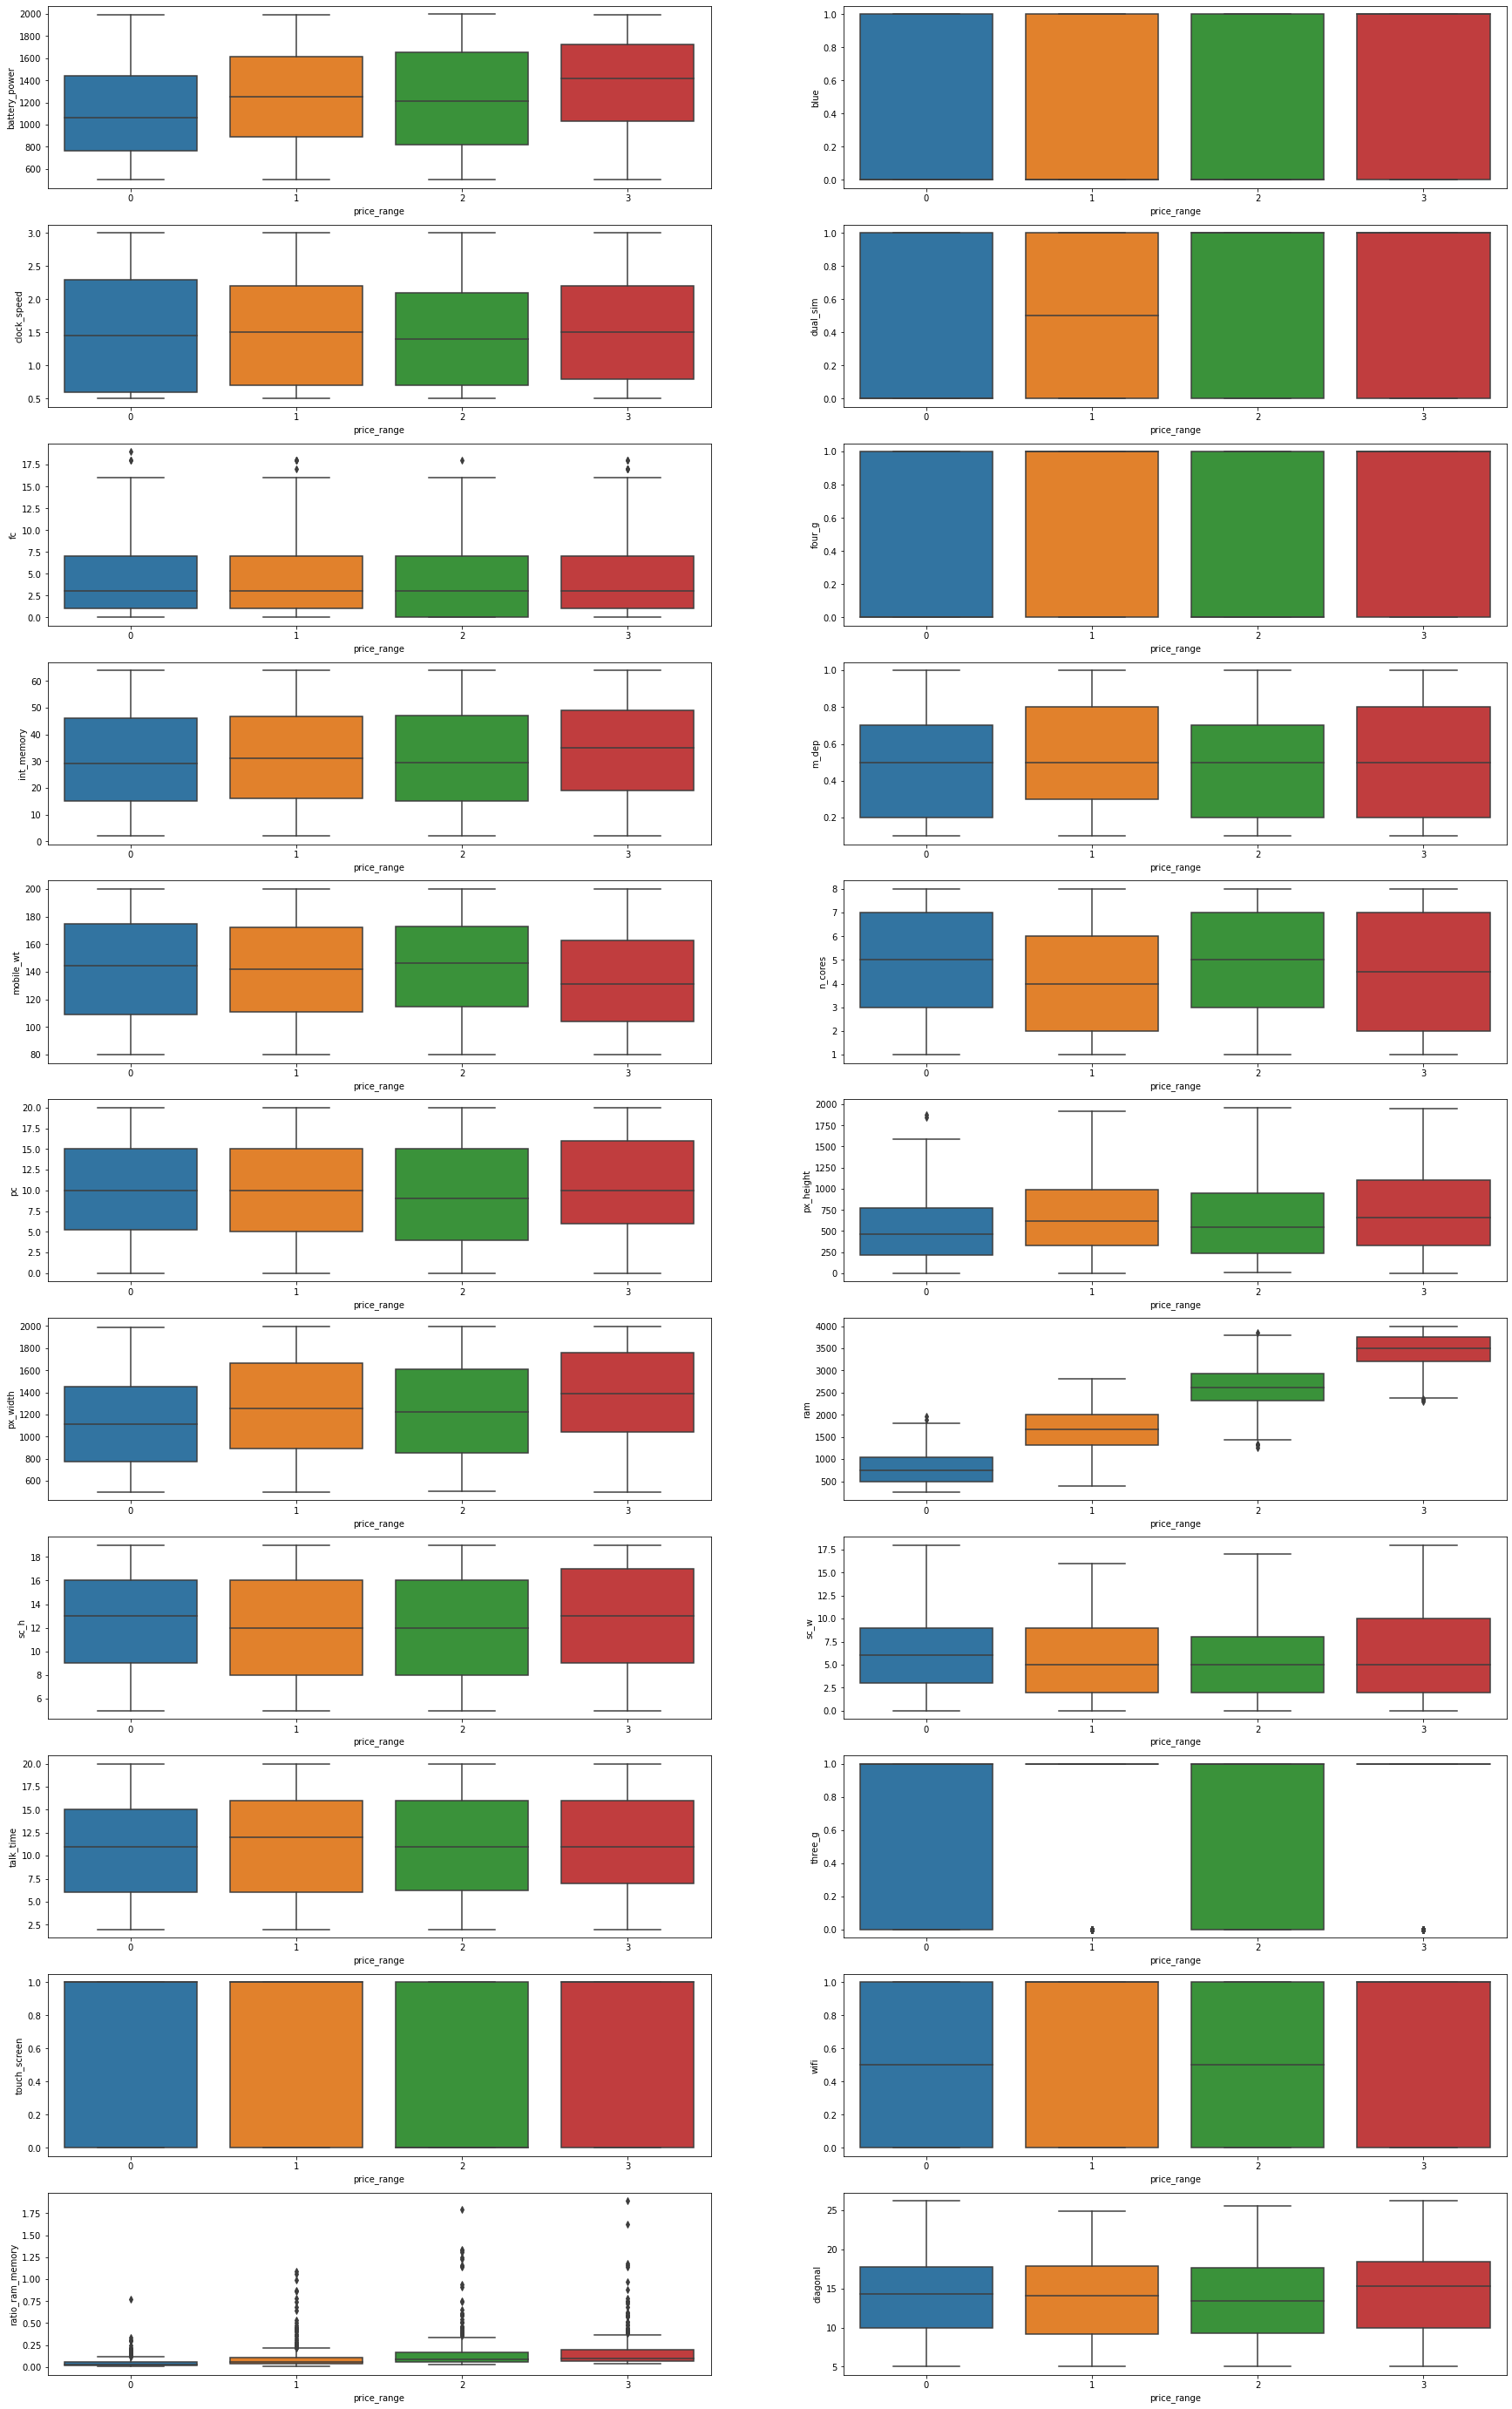

In [22]:
columns_feature = df_mobile_train.drop('price_range',axis=1).columns.tolist()
fig, ax = plt.subplots(11,2, figsize=(30,50))
for ix, col in enumerate(columns_feature):
    sns.boxplot(y=col, x='price_range', data=df_mobile_train, ax=ax.flatten()[ix])

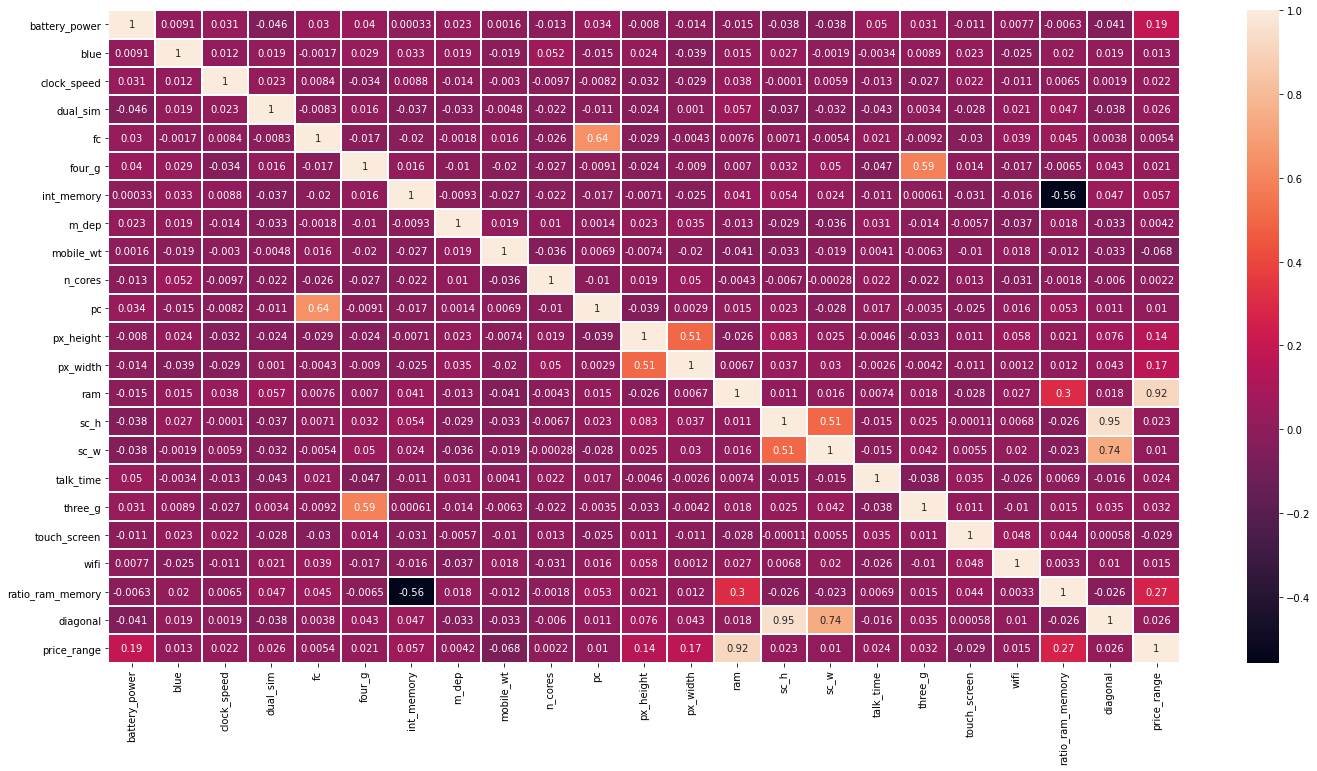

In [23]:
plt.figure(figsize = (24, 12))
corr = df_mobile_train.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

Scale continous columns using MinMaxScaler considering not too many outlier; battery_power, clock_speed, fc, int_memory, m_dep, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

scal_cols = ['battery_power', 'clock_speed', 'ratio_ram_memory', 'm_dep', 'n_cores', 'diagonal', 'mobile_wt']
do_nothing = ['blue','four_g','touch_screen','price_range']
scaler = StandardScaler()
do_thing = ['blue','four_g','touch_screen']
class DoNothingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.values
    
preprocess_transformer = ColumnTransformer([
    ('scal_col',scaler,scal_cols),
    ('do_nothing',DoNothingTransformer(),do_thing)
])


In [27]:
X_scaled = preprocess_transformer.fit_transform(df_mobile_train[scal_cols + do_nothing])
X_train_scaled = preprocess_transformer.fit_transform(X_train[scal_cols + do_thing])
X_test_scaled = preprocess_transformer.transform(X_test[scal_cols + do_thing])

### Model Training

There are three classifying models that the author considered to be suitable for the dataset; Logistic Regression for it's simplicity, Decision Tree for explainability, and KNeighbors for it's suitability for multiclass classifying.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# pipeline for logistic regression model
pipeline_log_reg = Pipeline([
    ('col_trf', preprocess_transformer),
    ('log_reg', LogisticRegression(multi_class='multinomial'))
])

# pipeline for decision tree
pipeline_dt = Pipeline([
    ('col_trf', preprocess_transformer),
    ('dt', DecisionTreeClassifier(random_state=10))
])

# pipeline for knn model
pipeline_knn = Pipeline([
    ('col_trf', preprocess_transformer),
    ('knn', KNeighborsClassifier())
])

In [29]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, make_scorer, recall_score, f1_score, accuracy_score
precision_scorer = make_scorer(precision_score, average='macro')
accuracy_scorer = make_scorer(accuracy_score)
recall_scorer = make_scorer(recall_score, average='macro')
f1_scorer = make_scorer(f1_score, average='macro') 

df_score = pd.DataFrame(columns=['method','r2_train_score','r2_test_score','precision_score','recall_score','accuracy_score','f1_score'])
for method in [pipeline_log_reg, pipeline_dt, pipeline_knn]:
    method.fit(X_train, y_train)
    
    scores = cross_validate(method, X_train, y_train, scoring=precision_scorer, return_train_score= True)
    df_score = df_score.append({
        'method': method[list(method.named_steps)[1]].__class__.__name__,
        'r2_train_score' : method.score(X_train, y_train),
        'r2_test_score' : method.score(X_test, y_test),
        'precision_score' :cross_val_score(method, X_train, y_train, scoring=precision_scorer).mean(),
        'recall_score' :cross_val_score(method, X_train, y_train, scoring=recall_scorer).mean(),
        'accuracy_score' :cross_val_score(method, X_train, y_train, scoring=accuracy_scorer).mean(),
        'f1_score' :cross_val_score(method, X_train, y_train, scoring=f1_scorer).mean()
    }, ignore_index=True)
df_score

,method,r2_train_score,r2_test_score,precision_score,recall_score,accuracy_score,f1_score
0,LogisticRegression,0.419286,0.406667,0.373504,0.400000,0.400000,0.373516
1,DecisionTreeClassifier,1.000000,0.411667,0.404853,0.405000,0.405000,0.404562
2,KNeighborsClassifier,0.512143,0.313333,0.286177,0.288571,0.288571,0.281213


Logistic Regression method turns out to be the most effective method for this dataset, considering from the r squared scores that the model does not overfit and the precision score is still high

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'log_reg__C' : [1,0.1,0.01],
    'log_reg__fit_intercept' : [True, False]
}

grid_search = GridSearchCV(pipeline_log_reg, param_grid, cv=5, scoring=precision_scorer)

In [31]:
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Pipeline(steps=[('col_trf',
                 ColumnTransformer(transformers=[('scal_col', StandardScaler(),
                                                  ['battery_power',
                                                   'clock_speed',
                                                   'ratio_ram_memory', 'm_dep',
                                                   'n_cores', 'diagonal',
                                                   'mobile_wt']),
                                                 ('do_nothing',
                                                  DoNothingTransformer(),
                                                  ['blue', 'four_g',
                                                   'touch_screen'])])),
                ('log_reg',
                 LogisticRegression(C=1, fit_intercept=False,
                                    multi_class='multinomial'))])

In [32]:
best_log = grid_search.best_estimator_
best_log.fit(X_train, y_train)
best_df = pd.DataFrame(columns=['r2_train','r2_test','precision_score'])
best_df = best_df.append({
    'r2_train': best_log.score(X_train, y_train),
    'r2_test' : best_log.score(X_test, y_test),
    'precision_score' : cross_val_score(best_log, X_train, y_train, scoring=precision_scorer).mean(),
    'recall_score' :cross_val_score(best_log, X_train, y_train, scoring=recall_scorer).mean(),
    'accuracy_score' :cross_val_score(best_log, X_train, y_train, scoring=accuracy_scorer).mean(),
    'f1_score' :cross_val_score(best_log, X_train, y_train, scoring=f1_scorer).mean()
}, ignore_index=True)
best_df

,r2_train,r2_test,precision_score,accuracy_score,f1_score,recall_score
0,0.401429,0.386667,0.380267,0.397143,0.361222,0.397143


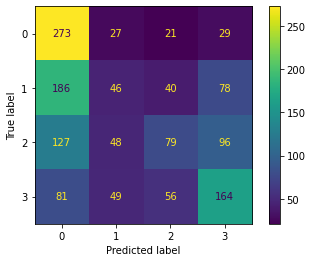

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_log, X_train, y_train)

### Feature Importances

In [33]:
coef_log = best_log.named_steps['log_reg'].coef_
feature_names = np.array([scal_cols + do_thing])[0]
coef_0 = pd.DataFrame({
    'name' : feature_names,
    'coef' : coef_log[0]
}).sort_values(by='coef')
coef_1 = pd.DataFrame({
    'name' : feature_names,
    'coef' : coef_log[1]
}).sort_values(by='coef')
coef_2 = pd.DataFrame({
    'name' : feature_names,
    'coef' : coef_log[2]
}).sort_values(by='coef')
coef_3 = pd.DataFrame({
    'name' : feature_names,
    'coef' : coef_log[3]
}).sort_values(by='coef')

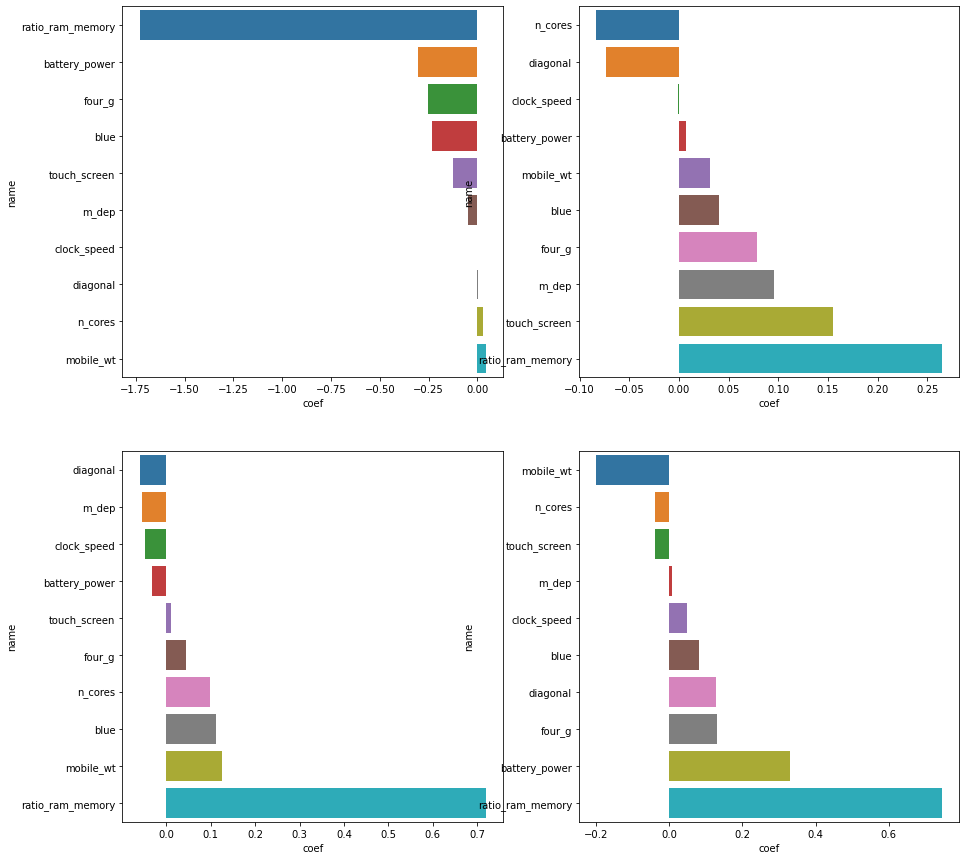

In [38]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
sns.barplot(y='name', x='coef', data=coef_0, ax= ax.flatten()[0]);
sns.barplot(y='name', x='coef', data=coef_1, ax= ax.flatten()[1]);
sns.barplot(y='name', x='coef', data=coef_2, ax= ax.flatten()[2]);
sns.barplot(y='name', x='coef', data=coef_3, ax= ax.flatten()[3]);

It's seen that ratio ram_memory feature is the most determining factor in classification for the mobile price range, we also can see that there is also not too many differences for the 0, and 1 class (low cost, and medium cost) with the 2, and 3 class (high cost, and very high cost). For further analyses or project, we also can divide the price range class into two classes only to simplify user in determining their mobile phone price range.

Looking at the features the model resulted, several actions can be done:
-  Use black box model such as LGBM to improve the prediction model's performance
-  Use the model's prediction as a feature to determine whether an employee is going to churn or not from the company, given the features


### Deployment

In [40]:
# source :https://github.com/daeIy/CRISP-DM-for-Marketing-Campaign/blob/master/.ipynb_checkpoints/CRISP_DM_implementation-checkpoint.ipynb
data_new = df_mobile.drop(['price_range'],axis=1)

n_ppl = 20 # Determine how many synthetic data to generate
data_syn = pd.DataFrame()
for col in data_new.columns:
    data_syn = pd.concat([data_syn, data_new[col].sample(n=n_ppl).to_frame().reset_index().drop(['index'],axis=1)],
                         axis=1)
data_syn

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,ratio_ram_memory,diagonal
0,730,1,0.6,0,7,1,55,0.2,179,2,...,1199,2620,12,11,5,1,0,1,0.029167,10.816654
1,1373,1,1.1,1,10,0,53,0.7,127,3,...,1383,589,7,5,4,1,0,1,0.046582,8.544004
2,1571,1,1.0,0,4,0,19,0.7,169,1,...,1648,1404,6,12,19,1,1,1,0.030281,13.416408
3,674,1,2.5,1,12,1,40,0.6,101,2,...,1942,3771,6,16,16,0,1,1,0.249200,10.049876
4,1836,0,2.3,1,2,1,8,0.9,98,4,...,522,2114,14,12,12,1,0,0,0.069000,7.211103
5,1993,0,1.9,1,0,0,15,0.6,194,2,...,1759,1628,11,2,16,1,0,0,0.273385,14.422205
6,615,1,0.5,0,0,1,11,0.1,196,5,...,1988,1142,5,16,16,1,1,0,0.077422,20.000000
7,977,1,2.7,0,3,1,10,0.2,121,3,...,1552,3615,13,7,4,1,1,1,0.160500,13.038405
8,1099,1,2.4,1,7,0,22,0.7,185,2,...,1240,1524,15,6,14,1,1,1,0.079073,19.026298
9,856,1,2.9,1,0,1,48,0.4,119,7,...,1972,337,5,7,3,0,1,1,0.005351,6.708204


In [41]:
def predict_price(dataset):
    idn=0
    for result in best_log.predict(dataset):
        print('User number {} mobile phone price classified in price class {}'.format(data_syn.index[idn], result))
        idn +=1

In [42]:
predict_price(data_syn)

User number 0 mobile phone price classified in price class 0
User number 1 mobile phone price classified in price class 0
User number 2 mobile phone price classified in price class 1
User number 3 mobile phone price classified in price class 1
User number 4 mobile phone price classified in price class 3
User number 5 mobile phone price classified in price class 3
User number 6 mobile phone price classified in price class 0
User number 7 mobile phone price classified in price class 3
User number 8 mobile phone price classified in price class 1
User number 9 mobile phone price classified in price class 0
User number 10 mobile phone price classified in price class 3
User number 11 mobile phone price classified in price class 0
User number 12 mobile phone price classified in price class 1
User number 13 mobile phone price classified in price class 0
User number 14 mobile phone price classified in price class 3
User number 15 mobile phone price classified in price class 1
User number 16 mob